# Support Vector Regression

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
data = pd.read_csv('maaslar.csv')
data.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [3]:
# Check null values in data
data.isnull().sum()

unvan              0
Egitim Seviyesi    0
maas               0
dtype: int64

In [4]:
# Data correlation (the relation between the dependent and independent columns)
# [-1,0) correlation: Negatively correlated. They oppositely affect each other
# (0,1] correlation: Positively correlated. They positively affect each other
# 0 correlation: There is no correlation between dependent and independent variables
data.corr()

,Egitim Seviyesi,maas
Egitim Seviyesi,1.000000,0.817949
maas,0.817949,1.000000


In [5]:
data.describe()

,Egitim Seviyesi,maas
count,10.00000,10.000000
mean,5.50000,12475.000000
std,3.02765,14968.694183
min,1.00000,2250.000000
25%,3.25000,3250.000000
50%,5.50000,6500.000000
75%,7.75000,13750.000000
max,10.00000,50000.000000


### Dataframe Slicing

In [6]:
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2:].values

## Data Scaling

Data scaling is required before using support vector regression. The fact that the data are too independent from each other 
negatively affects the estimation result.

In [7]:
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
x_scaled = scx.fit_transform(x)

scy = StandardScaler()
#y_scaled = scy.fit_transform(y)
y_scaled2 = np.ravel(scy.fit_transform(y.reshape(-1,1)))

## Fitting Support Vector Regression Model

In [8]:
from sklearn.svm import SVR

svr_reg = SVR(kernel = "rbf")
svr_reg.fit(x_scaled, y_scaled2)

SVR()

## Making a Prediction

In [9]:
y_pred = svr_reg.predict(x_scaled)

## Visualization

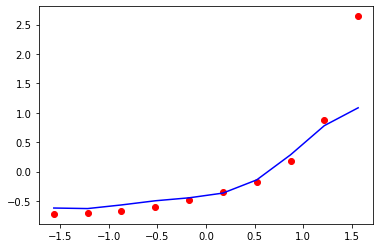

In [10]:
plt.scatter(x_scaled, y_scaled2, color = "red")
plt.plot(x_scaled, y_pred, color = "blue")
plt.show()

## Calculating Prediction Accuracy

In [11]:
from sklearn.metrics import r2_score
acc = r2_score(y_scaled2, y_pred)
print(acc)

0.7513836788854973


### Predictions

In [12]:
print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))

[0.01150915]
[0.01150915]
